# Project 2: Personal Loan Campaign

This case study is about a bank whose management wants to explore ways of converting its liability customers (customers who make deposits into a checking or savings account) to personal loan customers while retaining them as depositors. A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Objective: Predict the likelihood of a customer accepting a personal loan offer

The following steps will need to be accomplished in order to deliver this objective:
1. [Import the dataset and libraries](#1)
2. [Perform Exploratory Data Analysis to gain insights in the data](#2)
3. [Split our data into training and test sets](#3)
4. [Use Logistic Regression model to predict whether the customer will take personal loan or not](#4)
5. [Perform hyper-parameter tuning to improve model performace](#5)
6. [Provide Business understanding of your model](#6)

<a id="1"></a>
### Step 1: Import the dataset and libraries

In this section we will first load all of the nessecary libraries. Next we will load the dataset noting how many records there are, identifying the data types present, and checking for missing values.

#### 1.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# configure visualization defaults
plt.style.use('fivethirtyeight')
%matplotlib inline

# ignore warnings
import warnings; warnings.simplefilter('ignore')

# model algortihm Logistic Regression
from sklearn.linear_model import LogisticRegression

# model helpers
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PolynomialFeatures

# model performance measure
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve


#### 1.2 Load and inspect data

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
# verify the data loaded correctly
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


***Features***
* **Personal Loan** is our target variable and what we are trying to predict (did the customer accept the personal loan offered?). It is a nominal datatype of 1 for accepted and 0 for rejected. 
* **ID** is a unique number identifying the customer. These have no impact on the target and will be excluded from the analysis.
* **Age** is the customer's age in completed years (continuous).
* **Experience** is the customer's years of professional experience which is also continuous. As we will see later this feature is highly correlated with age and will be excluded from the analysis.
* **Income** is the annual income of the customer in 000 USD (continuous)
* **ZIP Code**  the customer's home address ZIP code (nominal)
* **Family**  family size of the customer which is a quantitative (discrete)
* **CCAvg**  average spending on credit cards per month (000 USD) (continuous)
* **Education** education level  1: Undergrad; 2: Graduate; 3: Advanced/Professional (Ordinal datatype)
* **Mortgage** value of house mortgage if any 000 USD (continuous)
* **Securities Account** does the customer have a securities account with the bank? 1 for yes 0 for no (nominal)
* **CD Account** does the customer have a certificate of deposit (CD) account with the bank? 1 for yes 0 for no (nominal)
* **Online** does the customer use internet banking facilities?1 for yes 0 for no (nominal)
* **Credit card** does the customer use a credit card issued by the bank? 1 for yes 0 for no (nominal)

In [4]:
# remove ID from the dataset
data.drop(columns='ID', inplace=True)

# check for data types, missing values, and observe the number of rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Our dataset consists of 5,000 rows and 13 columns all of which are numerical. There are no missing values in any of the columns. Now let's look at a quick statistical summary of our data.

In [5]:
# statistical summary 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


The Experience column has a strange minimum value of -3. We will dig into this in the next section. 

<a id="2"></a>
### Step 2: Exploratory Data Analysis

In this section we will investigate the relationships between pairs of features. This will provide insight as to which descriptive features might prove useful in predicting the response and also descriptive features that might be highly correlated with each other. Identifying pairs of the highly correlated descriptive features is one way in which we can reduce the number of input variables to our model because we can remove one of those features without reducing the predictive power of the model.

Before we jump in let's take a look at how many cumstomer's accepted the offer from the last campaign.

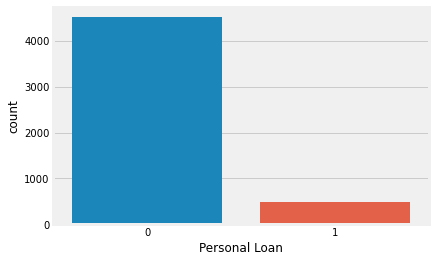

In [6]:
sns.countplot('Personal Loan', data=data);

In [7]:
data.groupby('Personal Loan')['Personal Loan'].count()

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

Out of the 5,000 offers that were extend, 480 were accepted for an acceptance rate of 9.6 percent. 
Next we check how many unique values we have in each column, the number of customers who are not homeowners, and customers who do not have any credit card debit.

In [8]:
# number of unique values in each column
data.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [9]:
# number of customers who are not homeowners
non_homeowners = data[data['Mortgage']==0].shape[0]
print("{} or {}% of customers are not homeowners.".format(non_homeowners,non_homeowners/data.shape[0]*100))

3462 or 69.24% of customers are not homeowners.


In [10]:
# number of customers with zero credit card spending per month
zero_debt_customers = data[data['CCAvg']==0].shape[0]
print("{} or {}% of customers have zero credit card debit.".format(zero_debt_customers,zero_debt_customers/data.shape[0]*100))

106 or 2.12% of customers have zero credit card debit.


#### 2.1 Univariate Analysis

###### Continuous Features

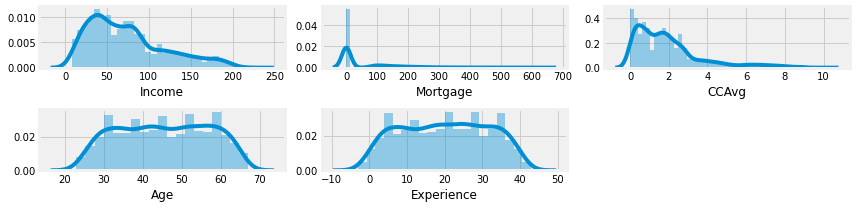

In [11]:
continuous_features = ['Income','Mortgage','CCAvg','Age','Experience']

fig, axes = plt.subplots(2, 3, figsize=(12, 3))

for idx,feature in enumerate(continuous_features):
    sns.distplot(data[feature], ax=axes.flatten()[idx]);
    
axes[1,2].set_axis_off()
plt.tight_layout()

Age and Experience are symmetrical distributions that look almost identical. Income and CCAvg have some postive skewness which is common for these features. Mortgage is highly skewed implying most customers are not homeowners.

###### Categorical Features

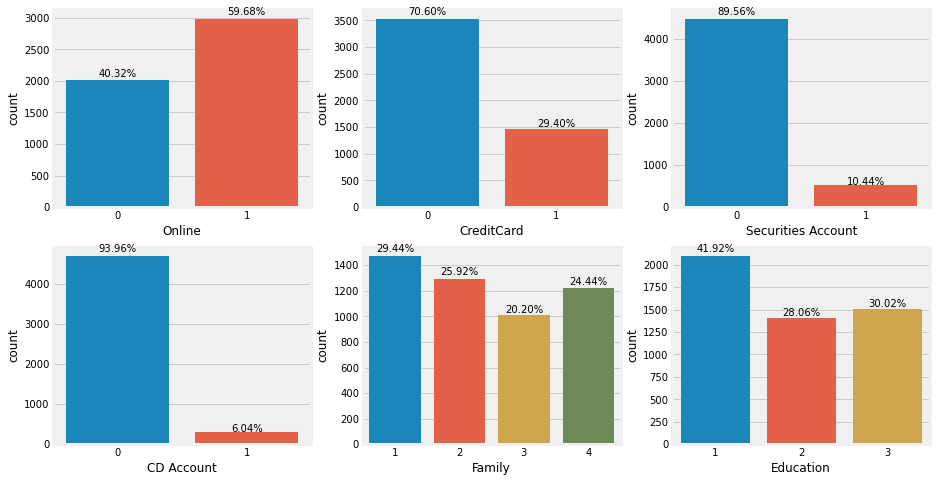

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

cat_features = ['Online','CreditCard','Securities Account','CD Account','Family','Education']

total = data.shape[0]

# create a countplot of the categorical features
for idx,feature in enumerate(cat_features): 
    ax=axes.flatten()[idx]
    sns.countplot(x=feature, data=data, ax=ax)
    
   # add percentages above the bars 
    for p in ax.patches:
        width = p.get_x()+p.get_width()/2.
        height = p.get_height()
        ax.text(width, # x cordinate 
                height*1.02, # y coordinate 
                '{:1.2f}%'.format(height/total*100), # divide the bar height by the total
                ha="center")

#### 2.2 Visualizing Pairs of Categorical Features

An effective way of visualizing the relationship between the response and several categorical features is through a collection of "small multiple" point plots. Below is such as collection displaying how the loan acceptance rate varies across the levels of Online, CreditCard, Securities Account, and CD Account. If a relationship exists then we should observe a noticeable departure from the 9.6 percent acceptance rate across the different levels. 

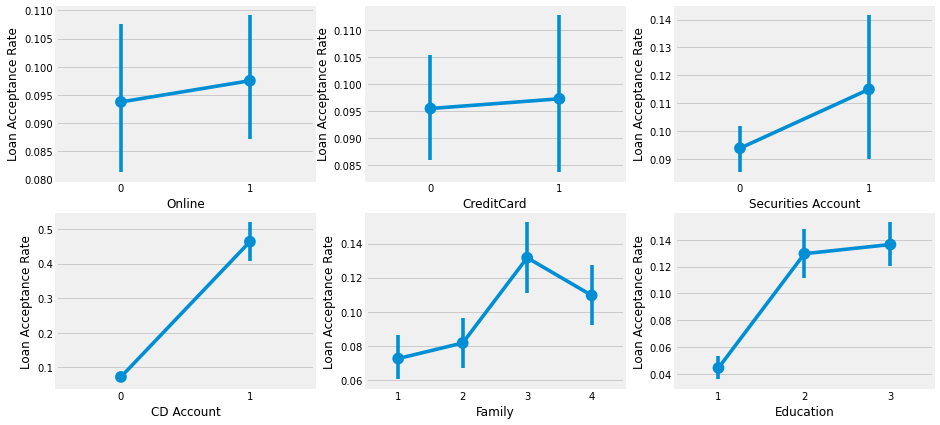

In [13]:
cat_features = ['Online','CreditCard','Securities Account','CD Account','Family','Education']

# prepare a figure that contains subplots for each nominal feature
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

sns.set_context(rc = {'lines.linewidth': 2} ) 

for idx,feature in enumerate(cat_features):
    
    ax = axes.flatten()[idx]
    
    # plot the data
    sns.pointplot(x=feature, y='Personal Loan', data=data, ax=ax);
    ax.set_ylabel('Loan Acceptance Rate')


We can clearly see a strong relationship between CD Account the response. The loan acceptance rate shoots up to approximately 46 percent when the customer holds a CD Account. Education also has a decent relationship with the reponse as the acceptance rate changes noticeably across the differnet levels of education. Customers who have postgraduate degrees are at least twice as likely to accept the offer compared to those who only have a undergraduate degree. There also appears to be a relationship with both Family and Securities Account. CreditCard and Online have little bearing on whether or not the customer will accept the offer.  

#### 2.3 Visualizing a Continuous Feature with a Categorical Response

In this section we will investigate the relationship between the loan acceptance rate and the continuous features in the dataset. Again one of the most effective ways of visualizing these relationships is through small multiples, but rather than using bar charts we will utilize box plots instead. If a relationship exists then we should observe a noticable difference in the central tendency and variation of the continuous feature across the different levels of the response. Once we have identified the most relevant features we can then take a more detailed look using small multiple histograms. 

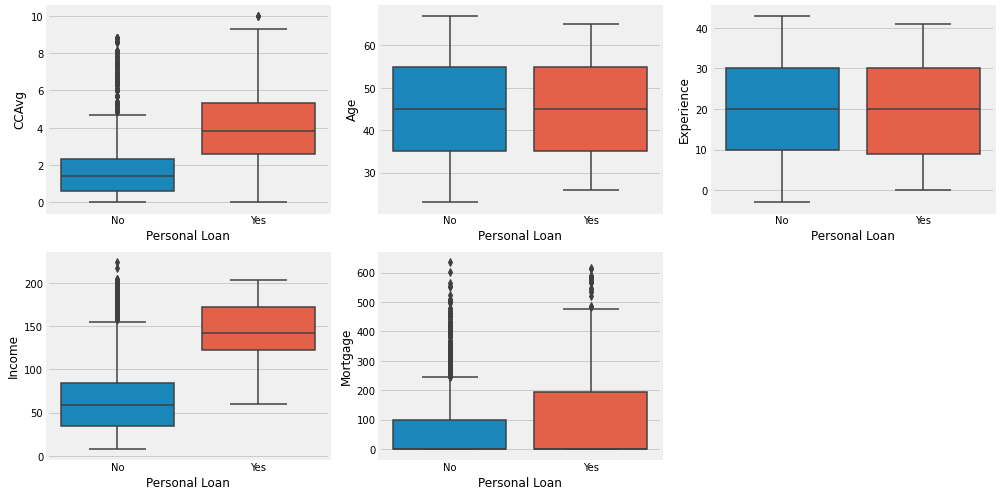

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

for idx,feature in enumerate(['CCAvg','Age','Experience','Income','Mortgage']):
    sns.boxplot(x=data['Personal Loan'].map({0: 'No', 1: 'Yes'}),
                y=feature, 
                data=data, 
                ax=axes.flatten()[idx], 
                linewidth=1.5);
    
axes[1,2].set_axis_off()
plt.tight_layout()

There is strong evidence for a relationship between Income and Personal Loan. Note the difference between median income for customers who accepted the offer and those that did not; we can see a difference of approximately $90k. There is some overlap bewtween the two groups but we can still see the seperation. The same can be said for CCAvg and Personal Loan. Meanwhile, there really is no seperation between the groups when we look at the age or experience features. The distribution of the features across the two groups is almost identical. It looks like there is not a significant relationship with Mortgage, but we will need to take a closer look.

We do see the presence of outliers. However, looking at the max values of Income, CCAvg, and Mortgage we can see all of these outliers appear to be valid data. 

In [15]:
print("Income Max = ${:,.2f}".format(data['Income'].max()*1000))
print("CCAvg Max = ${:,.2f}".format(data['CCAvg'].max()*1000))
print("Mortgage Max = ${:,.2f}".format(data['Mortgage'].max()*1000))

Income Max = $224,000.00
CCAvg Max = $10,000.00
Mortgage Max = $635,000.00


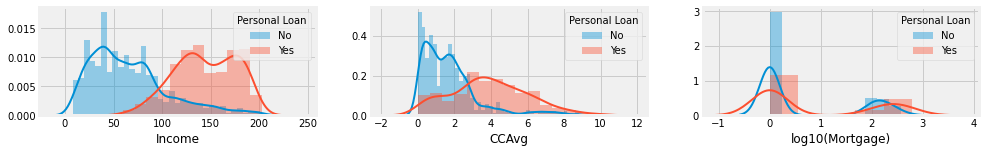

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))

for idx,feature in enumerate(['Income', 'CCAvg', 'Mortgage']):
    
    if feature != 'Mortgage':
        # plot distribution of income for customers who did not accept the offer
        sns.distplot(data[feature].loc[data['Personal Loan']==0], kde_kws=dict(linewidth=2), ax=axes[idx], label='No')

        # plot distribution of income for customers who did accept the offer
        sns.distplot(data[feature].loc[data['Personal Loan']==1], kde_kws=dict(linewidth=2), ax=axes[idx], label='Yes')
        
        axes[idx].legend(title="Personal Loan");
    else:
        
        # plot distribution of income for customers who did not accept the offer
        sns.distplot(np.log10(data['Mortgage'].loc[data['Personal Loan']==0]+1), kde_kws=dict(linewidth=2), label='No');

        # plot distribution of income for customers who did accept the offer
        sns.distplot(np.log10(data['Mortgage'].loc[data['Personal Loan']==1]+1), kde_kws=dict(linewidth=2), label='Yes');

        axes[idx].legend(title="Personal Loan"); 
        axes[idx].set_xlabel("log10(Mortgage)");
    


The above histograms provide a more detailed look on the distributions of Income, CCAvg, and Mortgage. Besides the clear seperation between the two classes we can see that no customers with an income less than $50k accepted the offer. Furthermore, the income distribution for customers who did accept is bimodal indicating there is, perhaps, two distinct customer segements within this distribution. The distribution of CCAvg suggests that the chances of accpetance really start to increase around 2 CCavg and the chances for success are the the highest between 3 and 6 CCAvg. For mortgage however, there really is no seperation between the two classes. We should consider dropping this feature from the dataset.

###### Income and Education

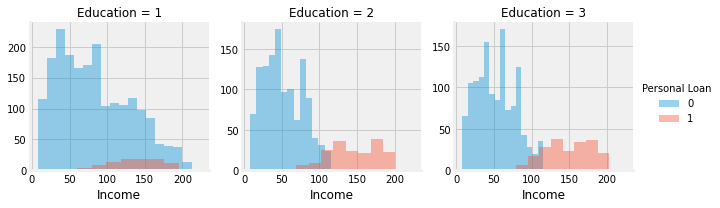

In [17]:
# Distribution plot comparison of CD Account, Education, and Income by Personal Loan
h = sns.FacetGrid(data, col = 'Education', hue = 'Personal Loan',sharey=False)
h.map(sns.distplot, 'Income', kde=False);
h.add_legend();

All customers who have a postgraduate degree and make approximately more than $110K a year all accepted the offer. For the next campaign we will recommend that offers should be extended to all customers within this segment. Also, the income distribution between Education levels two and three does not change significantly. Perhaps adding a postgraduate degree feature would be beneficial. 

In [18]:
# add postgraduate degree feature
data['PostgradDeg'] = np.where(data['Education']==1, 0, 1)

###### Income and Family

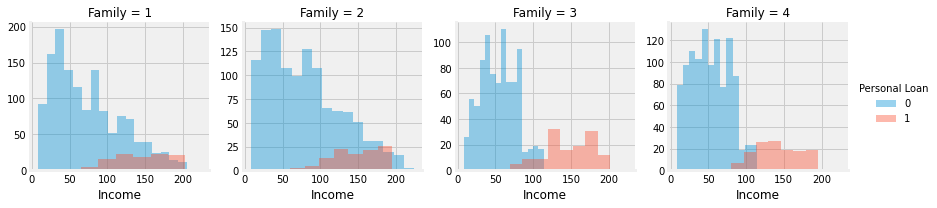

In [19]:
h = sns.FacetGrid(data, col = 'Family', hue = 'Personal Loan',sharey=False)
h.map(sns.distplot, 'Income', kde=False);
h.add_legend();

Similar trend here. All customers with a family size of 3 or more and who make approximately more than $110K a year all accepted the offer. There are some clear seperations between the two distributions, especially when the family size is three or four. 

###### CCAvg and Education

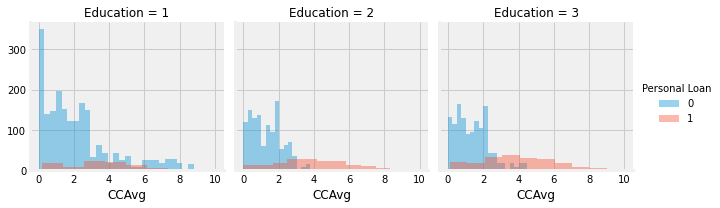

In [20]:
# Distribution plot comparison of CD Account, Educcation, and CCAvg by Personal Loan
h = sns.FacetGrid(data, col = 'Education', hue = 'Personal Loan', sharey=True)
h.map(sns.distplot, 'CCAvg', kde=False);
h.add_legend();

There is a clear seperation between the distributions. The range of credit card debit is pretty similar accross the levels of education. However, all customers who pay more than approximately $5,000/mo in credit card debit and who have a postgraduate degree all excepted the offer. Perhaps these are customers who refinance their credit debt at a lower interest rate. 

###### CCAvg and Family

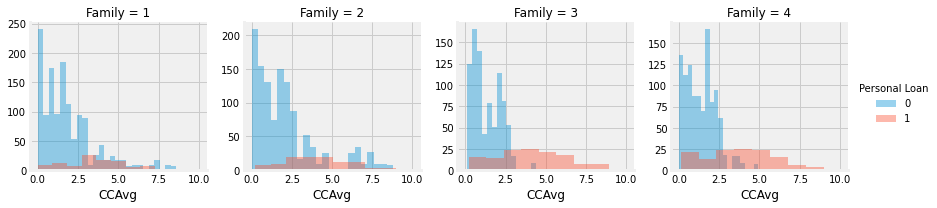

In [21]:
h = sns.FacetGrid(data, col = 'Family', hue = 'Personal Loan', sharey=False)
h.map(sns.distplot, 'CCAvg', kde=False);
h.add_legend();

Similar behavior here as well. Past a family size of 2 all customers who pay more than approximately $5,000/mo in credit card debit all excepted the offer. 

#### 2.4 Visualizing Pairs of Continuous Features

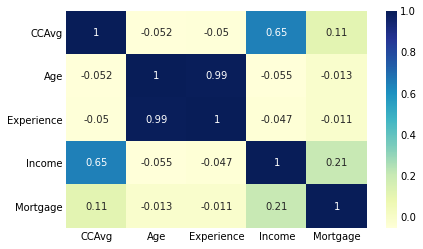

In [22]:
corr_df = data[['CCAvg','Age','Experience','Income','Mortgage']].corr()

sns.heatmap(corr_df,  annot=True, cmap="YlGnBu");

Age and Experience are highly correlated suggesting would should drop Experience from the data set.

<a id="3"></a>
### Step 3: Split data into training and test sets

Before training the model we will perform some preprocessing by first dropping the irrelevant columns Mortgage, Age, Experience, and Zip Code from the datset and then add some interaction terms using PolynomialFeatures from sklearn's preprocessing class. After that we will split our data into a train test set using a 70 - 30 split. Finally we will scale all of our input features using MinMaxScaler.

In [23]:
# drop irrelevant features
data.drop(columns=['Age','Experience','ZIP Code','Mortgage'],inplace=True)

# initialize polynomial features keeping only the interaction terms
interaction_features = PolynomialFeatures(interaction_only=True)

# create input feature array
X = data.drop(columns=['Personal Loan'])

print("Number of features before adding interaction terms = {}".format(X.shape[1]))

# add interaction terms
X = interaction_features.fit_transform(X)

print("Number of features after adding interaction terms = {}".format(X.shape[1]))

# create prediction labels
y = data['Personal Loan']

# 70:30 test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# initialize minmax scaler
minmax_scaler = MinMaxScaler()

# Scale the training data to fall in the range [0,1]
X_train_scaled = minmax_scaler.fit_transform(X_train)

# Scale the test data
X_test_scaled = minmax_scaler.transform(X_test)

Number of features before adding interaction terms = 9
Number of features after adding interaction terms = 46


<a id="4"></a>
### Step 4: Build Base Model Using Logistic Regression

Now we are ready to build our model. By default sklearn's LogisticRegression class applies L2 regularization with $\lambda = 1/C$, where $C = 100$.

In [24]:
# initialize the model
logreg = LogisticRegression(random_state=1)

# fit the model to the scaled training data
logreg.fit(X_train_scaled, y_train)

# make predicitons using the scaled test data
y_test_pred = logreg.predict(X_test_scaled)

In [25]:
# Classification Report
print('Classification Report')
print(classification_report(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1351
           1       0.98      0.74      0.85       149

    accuracy                           0.97      1500
   macro avg       0.98      0.87      0.92      1500
weighted avg       0.97      0.97      0.97      1500



Already our model is performing extremely well with a 98% accuracy! Let's see if we can improve on the accuracy, precision, and recall by tuning the hyper parameters of the model.

<a id="5"></a>
### Step 5: Hyper Parameter Tuning

We can determine the best hyper parameters by doing a grid search over the parameters using Sklearn's GridSearchCV. We can get an exhaustive list of these parameters using the get_paramters method

In [26]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

Using 10-fold cross validation, we will search over the penalties, class_weight, and the regulization parameters C and l1_ratio that maximizes the F1 score which strikes a good balance between precision and recall.

In [27]:
class_weights = [None,'balanced']
C_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

parameters = [
    {'penalty':['l2'], 'solver':['newton-cg','saga'], 'C':C_range, 'class_weight':class_weights},
    {'penalty':['l1'], 'solver':['liblinear','sage'], 'C':C_range, 'class_weight':class_weights},
    {'penalty':['elasticnet'], 'solver':['saga'], 'l1_ratio':np.linspace(0,1,10), 'class_weight':class_weights}
]

# initialize the esimator in this case logistic regression
logreg = LogisticRegression(random_state=1)

# perform grid search that maximizes F1
clf = GridSearchCV(estimator=logreg, # logistic regression model
                   param_grid=parameters, # Parameter space to search over
                   scoring='f1', # Performance metric to maximize
                   cv=10 # 10-fold cross validation
                  );

# refit the model
clf.fit(X_train_scaled, y_train);

print("Best score = {}".format(clf.best_score_))
print("Best parameters = {}".format(clf.best_params_))

Best score = 0.8980146751174416
Best parameters = {'C': 1000.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}


The best regulization method found during the grid search was the L2 penalty with a C value of 1000. Also the class weight was kept at none rather than balancing the log-loss function.  

Now we can evaluate the model's performance with the tuned parameters.

In [28]:
# make prediction on the test set
y_test_pred = clf.predict(X_test_scaled)

# Classification Report
print('--'*20)
print('Classification Report')
print(classification_report(y_test,y_test_pred))

----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.94      0.81      0.87       149

    accuracy                           0.98      1500
   macro avg       0.96      0.90      0.93      1500
weighted avg       0.98      0.98      0.98      1500



After parameter tuning we get an increase in both accuracy, recall, and F1. Precision did drop from .98 to .94 but this is certainly outweighed by the boost in recall (up to 0.81 from 0.74). 

<a id="6"></a>
### Step 6: Provide Business Understanding

In the sections above we touched upon precision and recall and how they are alternative measures to accuracy when assessing a model's performance. These measures and the values that are used to calculate them can be nicely visualized with a confusion matrix. Below is a confusion matrix for the model we tuned above.

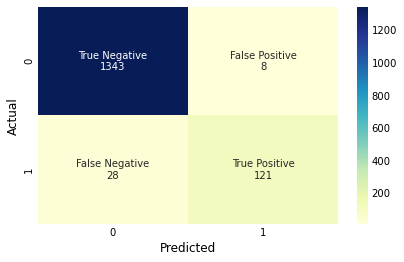

In [29]:
# create confusion matrix using the test set
confmat = confusion_matrix(y_test,y_test_pred)


names = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{0:0.0f}'.format(value) for value in confmat.flatten()] # get counts from the confusion matrix
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names,counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confmat, annot=labels, fmt='', cmap="YlGnBu")
plt.xlabel("Predicted");
plt.ylabel("Actual");

This confusion matrix could use some explanation:
- True Positives (TP) is the number of customers the model predicted would accept the offer and the customer did accept. The number of true positives for our model is 121.
- False Positives (FP) is the number of customers the model predicted would accept the offer but the customer actually declined. The number of false positives is 8.
- True Negative (TN) is the number of customers the model predicted would decline the offer and the customer did decline. The number of true negatives is 1343
- False Negatives is the number of customers the model predicted would decline the offer but the customer actually accepted. The number of false negatives is 28.

Using the quantities above we can define the metrics of precision, recall, and f1. Precision is given by 
<br/><br/>
$Precision = \frac{TP}{TP + FP}.$
<br/><br/>
Precision tells use how often our model is correct when it predicts a positive outcome. Our model's precision is 0.94 which indicates that when it predicts a positive outcome it is correct 94% precent of the time. Precision is a good measure to judge a model by when the cost of false positives is large. 
<br/>
Recall on the other hand is defined as
<br/><br/>
$Recall = \frac{TP}{TP + FN}.$
<br/><br/>
Recall, also known as the true positive rate, tells use how sensitive the model is in detecting positive cases. In other words, in all of the positive cases how many did it correctly identify. Our model's recall is 0.81. Recall is a good measure to judge a model by when the cost of false negatives is large.  
<br/>
Finally, precision and recall can be combined into a single measure called the F1 score. The F1 score, or the harmonic mean, is 
<br/><br/>
$F1 = 2x\frac{Precision * Recall}{Precision + Recall}.$
<br/><br/>
The F1 measure is a good go-to when we need to strike a balance between precision and recall in the presence of an uneven class distribution. It's for this reason that we chose to maximize F1 during the hyper-parameter tuning because the positive class occurs only 9.6% of the time. Furthermore, the small number of false positives that the model is returning is far outweighed by the total number of new customers that would be gained. With an accuracy of almost 98% percent combined with a precision and recall of 0.94 and 0.81, respectively, we can be sure that the business objective of increasing the success rate of the next marketing campaign while keeping the budget to a minimum will be met. 